In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import pandas as pd

In [ ]:
def RMSE(x,y):
  return np.sqrt(mean_squared_error(x,y))

In [13]:
set = pd.read_csv("waiting_times_train.csv")
set.describe()

,ADJUST_CAPACITY,DOWNTIME,CURRENT_WAIT_TIME,TIME_TO_PARADE_1,TIME_TO_PARADE_2,TIME_TO_NIGHT_SHOW,WAIT_TIME_IN_2H
count,37018.000000,37018.000000,37018.000000,22994.000000,6212.000000,22994.000000,37018.000000
mean,413.738352,0.268761,23.389567,171.926590,-136.502737,425.542968,23.605678
std,252.389589,1.594229,14.114572,194.196677,184.119044,203.332305,14.282232
min,3.400000,0.000000,0.000000,-480.000000,-595.000000,-165.000000,0.000000
25%,247.000000,0.000000,15.000000,15.000000,-285.000000,255.000000,15.000000
50%,247.000000,0.000000,25.000000,180.000000,-135.000000,420.000000,25.000000
75%,756.000000,0.000000,30.000000,345.000000,20.000000,585.000000,35.000000
max,756.000000,14.000000,155.000000,570.000000,235.000000,840.000000,155.000000


In [16]:
meteo = pd.read_csv("weather_data.csv")
train_set = set.merge(meteo, on= "DATETIME", how = "left")
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37018 entries, 0 to 37017
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATETIME                  37018 non-null  object 
 1   ENTITY_DESCRIPTION_SHORT  37018 non-null  object 
 2   ADJUST_CAPACITY           37018 non-null  float64
 3   DOWNTIME                  37018 non-null  int64  
 4   CURRENT_WAIT_TIME         37018 non-null  int64  
 5   TIME_TO_PARADE_1          22994 non-null  float64
 6   TIME_TO_PARADE_2          6212 non-null   float64
 7   TIME_TO_NIGHT_SHOW        22994 non-null  float64
 8   WAIT_TIME_IN_2H           37018 non-null  float64
 9   temp                      37018 non-null  float64
 10  dew_point                 37018 non-null  float64
 11  feels_like                37018 non-null  float64
 12  pressure                  37018 non-null  float64
 13  humidity                  37018 non-null  float64
 14  wind_s

In [10]:
Y = train_set['WAIT_TIME_IN_2H']
print(Y)
categories = train_set.columns.tolist()
print(categories)

0        30.0
1        25.0
2        35.0
3        10.0
4        10.0
         ... 
37013    10.0
37014    20.0
37015    10.0
37016    45.0
37017    20.0
Name: WAIT_TIME_IN_2H, Length: 37018, dtype: float64
['DATETIME', 'ENTITY_DESCRIPTION_SHORT', 'ADJUST_CAPACITY', 'DOWNTIME', 'CURRENT_WAIT_TIME', 'TIME_TO_PARADE_1', 'TIME_TO_PARADE_2', 'TIME_TO_NIGHT_SHOW', 'WAIT_TIME_IN_2H']


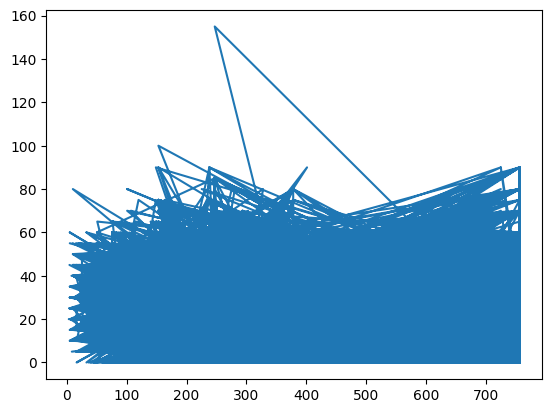

In [11]:
plt.figure()
plt.plot(train_set["ADJUST_CAPACITY"], Y)
plt.show()

In [ ]:
def poly_fit(X, Y, deg):
            
    #prend X et renvoit un tableau avec les X, X**2 ect jusqu'à X**deg
    X_poly = PolynomialFeatures(degree=deg).fit_transform(X)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly,Y)
    return lin_reg

#pour appliquer la regression sur de nouvelles valeures
def poly_aply(lin_reg, degree,X):
    
    
    X_poly = PolynomialFeatures(degree=degree).fit_transform(X)
    return lin_reg.predict(X_poly)


In [ ]:
#calcul du rmse pour 
deg = 5
X_train = 
lin_reg = poly_fit()